# Configuration

In [1]:
# Parameters
PROJECT_NAME = 'ML1010-Group-Project'
ENABLE_COLAB = False

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1010-Group-Project
The current time is 22:17
Hello sir. I see you are having a productive evening.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


nltk.download('stopwords')
%matplotlib inline

'Google Colab not enabled'

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import cw_df_metric_utils as cwutils

2022-01-06 22:17:33.532865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-06 22:17:33.532899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
axis_labels5=[1,2,3,4,5]
axis_labels2=[0,1]

# Load Data

In [6]:
jarvis.getPackageVersion('pandas')
!python -V
jarvis.showProjectDataFiles()

pandas version: pandas 1.3.5
Python 3.7.12
Here are all your project data files
[D] /home/magni//ML_Root/project_root/data/ML1010-Group-Project [Empty directory]

[D] /home/magni//ML_Root/project_root/data/ML1010-Group-Project/01_original
---[   gz][ json]--> Cell_Phones_and_Accessories.json.gz (1.15 GB)
---[   gz][ json]--> Cell_Phones_and_Accessories_5.json.gz (161.24 MB)
---[   gz][ json]--> meta_Cell_Phones_and_Accessories.json.gz (343.33 MB)

[D] /home/magni//ML_Root/project_root/data/ML1010-Group-Project/02_working
[*][  pkl]---------> 01_Cellphone_small.pkl (45.46 MB)
---[   gz][  pkl]--> 01_NLP_ReviewText_Narrow_1.pkl.gz (6.88 MB)
---[   gz][  pkl]--> 01_NLP_ReviewText_Narrow_2.pkl.gz (170.55 MB)
---[   gz][  pkl]--> 01_NLP_ReviewText_Narrow_3.pkl.gz (295.59 MB)
[*][  pkl]---------> 01_NLP_ReviewText_small.pkl (28.94 MB)
[*][  pkl]---------> 01_NLP_Summary_small.pkl (3.82 MB)
[*][  pkl]---------> 01_NLP_Title_small.pkl (2.73 MB)
---[   gz][  pkl]--> 01_NL_ReviewText_All(new).pk

In [7]:
dataSrc = pd.read_pickle(jarvis.DATA_DIR_WORK + "/01_NL_ReviewText_All(new).pkl.gz")
mvutils.exploreDataframe (dataSrc, numRecords=1)

dataframe shape: (63413, 49)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63413 entries, 0 to 63412
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   uuid                                    63413 non-null  object 
 1   reviewText                              63413 non-null  object 
 2   overall                                 63413 non-null  float64
 3   reviewText_lemma                        63413 non-null  object 
 4   reviewText_nouns                        63413 non-null  object 
 5   reviewText_adjectives                   63413 non-null  object 
 6   reviewText_verbs                        63413 non-null  object 
 7   reviewText_nav                          63413 non-null  object 
 8   reviewText_lemma_tb_pol                 63310 non-null  float64
 9   reviewText_lemma_tb_subj                63310 non-null  float64
 10  reviewText_

,uuid,reviewText,overall,reviewText_lemma,reviewText_nouns,reviewText_adjectives,reviewText_verbs,reviewText_nav,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj,...,reviewText_nav_flairSent_norm,reviewText_nav_flairSent_posneg,reviewText_lemma_tb_pol_norm,reviewText_lemma_tb_pol_posneg,reviewText_adjectives_tb_pol_norm,reviewText_adjectives_tb_pol_posneg,reviewText_verbs_tb_pol_norm,reviewText_verbs_tb_pol_posneg,reviewText_nav_tb_pol_norm,reviewText_nav_tb_pol_posneg
0,e5322688-1105-401b-be69-888bc1d89bcf,This phone is ugly and heavy and has a terribl...,1.0,phone ugly heavy terrible user interface techi...,phone user interface techie call Manhattan Mot...,ugly heavy terrible crazy well well well small...,drop take give want stay,phone user interface techie call Manhattan Mot...,-0.435714,0.785714,...,1.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,2.0,0.0



Bottom 1 in dataframe


,uuid,reviewText,overall,reviewText_lemma,reviewText_nouns,reviewText_adjectives,reviewText_verbs,reviewText_nav,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj,...,reviewText_nav_flairSent_norm,reviewText_nav_flairSent_posneg,reviewText_lemma_tb_pol_norm,reviewText_lemma_tb_pol_posneg,reviewText_adjectives_tb_pol_norm,reviewText_adjectives_tb_pol_posneg,reviewText_verbs_tb_pol_norm,reviewText_verbs_tb_pol_posneg,reviewText_nav_tb_pol_norm,reviewText_nav_tb_pol_posneg
63412,8f71ec3b-73e0-408e-b7e0-acd146f697e7,This is a great Smartphone for someone who's n...,4.0,great smartphone entirely sure want smartphone...,smartphone smartphone cost Samsung thing quali...,great sure cheap low high low able nice afford...,want construct stem leave blink opt leave prod...,smartphone smartphone cost Samsung thing quali...,0.179815,0.623735,...,1.0,0.0,3.0,1.0,3.0,1.0,3.0,0.0,4.0,1.0


# Lemma - dropNA and Balance (2 class and 5 class)

In [8]:
dataCoreLemma = dataSrc[['uuid',
                         'overall',
                         'overall_posneg',
                         'reviewText_lemma',
                         'reviewText_lemma_tb_pol',
                         'reviewText_lemma_tb_subj',
                         'reviewText_lemma_tb_tokens', 
                         'reviewText_lemma_tb_length',
                         'reviewText_lemma_bert',
                         'reviewText_lemma_flairSent',
                         'reviewText_lemma_flairSent_norm',
                         'reviewText_lemma_flairSent_posneg',
                         'reviewText_lemma_tb_pol_norm',
                         'reviewText_lemma_tb_pol_posneg'
                        ]].copy()

In [9]:
dataCoreLemma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63413 entries, 0 to 63412
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uuid                               63413 non-null  object 
 1   overall                            63413 non-null  float64
 2   overall_posneg                     63413 non-null  int64  
 3   reviewText_lemma                   63413 non-null  object 
 4   reviewText_lemma_tb_pol            63310 non-null  float64
 5   reviewText_lemma_tb_subj           63310 non-null  float64
 6   reviewText_lemma_tb_tokens         63310 non-null  float64
 7   reviewText_lemma_tb_length         63310 non-null  float64
 8   reviewText_lemma_bert              63413 non-null  object 
 9   reviewText_lemma_flairSent         63310 non-null  float64
 10  reviewText_lemma_flairSent_norm    63310 non-null  float64
 11  reviewText_lemma_flairSent_posneg  63310 non-null  flo

In [10]:
#Drop null values from flairSent
dataCoreLemma.dropna(subset=['reviewText_lemma_flairSent'], inplace=True)
dataCoreLemma.reset_index(drop=True, inplace=True)
dataCoreLemma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63310 entries, 0 to 63309
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uuid                               63310 non-null  object 
 1   overall                            63310 non-null  float64
 2   overall_posneg                     63310 non-null  int64  
 3   reviewText_lemma                   63310 non-null  object 
 4   reviewText_lemma_tb_pol            63310 non-null  float64
 5   reviewText_lemma_tb_subj           63310 non-null  float64
 6   reviewText_lemma_tb_tokens         63310 non-null  float64
 7   reviewText_lemma_tb_length         63310 non-null  float64
 8   reviewText_lemma_bert              63310 non-null  object 
 9   reviewText_lemma_flairSent         63310 non-null  float64
 10  reviewText_lemma_flairSent_norm    63310 non-null  float64
 11  reviewText_lemma_flairSent_posneg  63310 non-null  flo

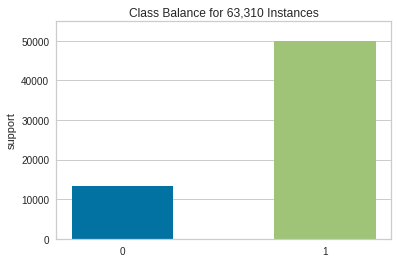

Undersampling data to match min class: 0 of size: 13410


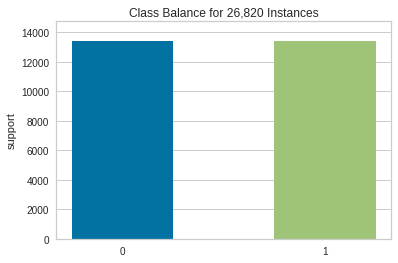

In [11]:
dataCoreLemmaBal2 = mvutils.classBalanceUndersample(dataCoreLemma, 'overall_posneg')

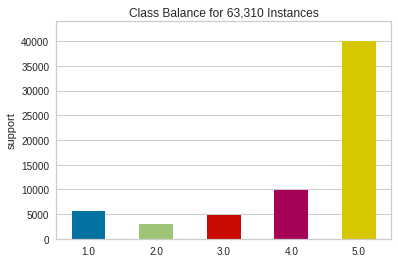

Undersampling data to match min class: 2.0 of size: 2939


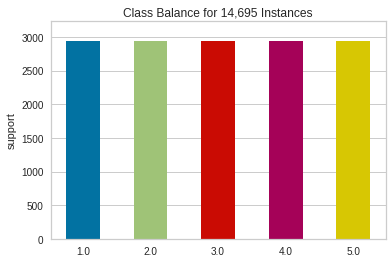

In [12]:
dataCoreLemmaBal5 = mvutils.classBalanceUndersample(dataCoreLemma, 'overall')

# Lemma - Prune data and Balance (2 class and 5 class)

In [13]:
dataCoreLemmaPrune = dataCoreLemma.copy()
dataCoreLemmaPrune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63310 entries, 0 to 63309
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uuid                               63310 non-null  object 
 1   overall                            63310 non-null  float64
 2   overall_posneg                     63310 non-null  int64  
 3   reviewText_lemma                   63310 non-null  object 
 4   reviewText_lemma_tb_pol            63310 non-null  float64
 5   reviewText_lemma_tb_subj           63310 non-null  float64
 6   reviewText_lemma_tb_tokens         63310 non-null  float64
 7   reviewText_lemma_tb_length         63310 non-null  float64
 8   reviewText_lemma_bert              63310 non-null  object 
 9   reviewText_lemma_flairSent         63310 non-null  float64
 10  reviewText_lemma_flairSent_norm    63310 non-null  float64
 11  reviewText_lemma_flairSent_posneg  63310 non-null  flo

In [57]:
mvutils.examineColumnNumeric(dataCoreLemmaPrune, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=1, 
                             zoom=False,
                             minZoomLevel=0,
                             maxZoomLevel=20,
                             plotsize=5)

KeyboardInterrupt: 

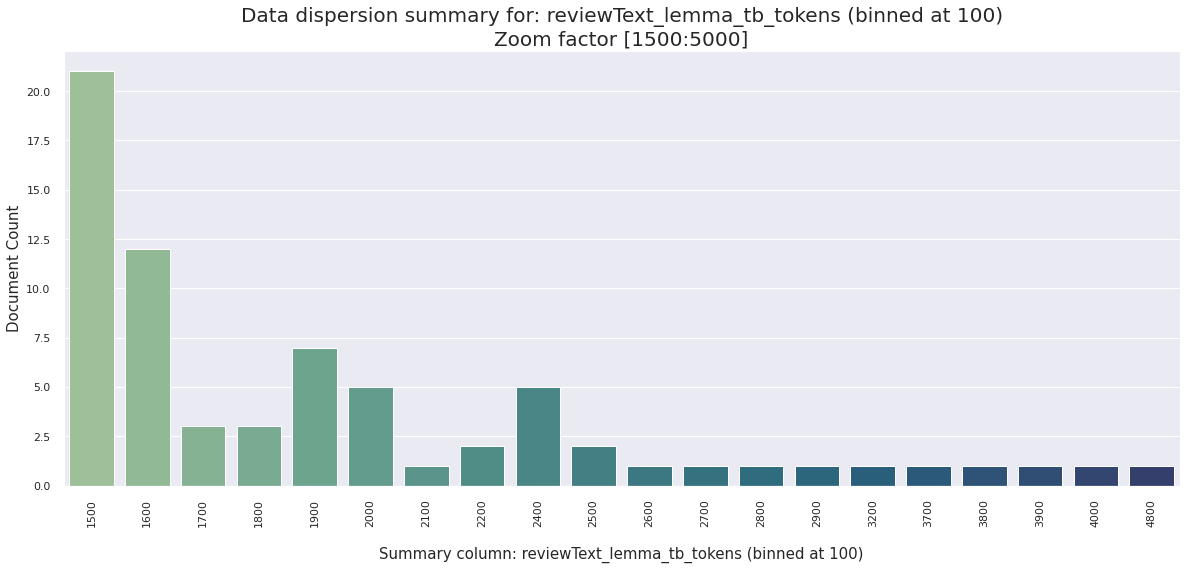

In [15]:
mvutils.examineColumnNumeric(dataCoreLemmaPrune, 
                             'reviewText_lemma_tb_tokens', 
                             binsize=100, 
                             zoom=True,
                             minZoomLevel=1500,
                             maxZoomLevel=5000,
                             plotsize=5)

In [16]:
#import numpy as np
idx = np.where((dataCoreLemmaPrune['reviewText_lemma_tb_tokens']>=5) &
               (dataCoreLemmaPrune['reviewText_lemma_tb_tokens']<= 2100))

In [17]:
dataCoreLemmaPrune = dataCoreLemmaPrune.loc[idx].copy()
dataCoreLemmaPrune.reset_index(inplace=True, drop=True)

In [18]:
dataCoreLemmaPrune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41952 entries, 0 to 41951
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uuid                               41952 non-null  object 
 1   overall                            41952 non-null  float64
 2   overall_posneg                     41952 non-null  int64  
 3   reviewText_lemma                   41952 non-null  object 
 4   reviewText_lemma_tb_pol            41952 non-null  float64
 5   reviewText_lemma_tb_subj           41952 non-null  float64
 6   reviewText_lemma_tb_tokens         41952 non-null  float64
 7   reviewText_lemma_tb_length         41952 non-null  float64
 8   reviewText_lemma_bert              41952 non-null  object 
 9   reviewText_lemma_flairSent         41952 non-null  float64
 10  reviewText_lemma_flairSent_norm    41952 non-null  float64
 11  reviewText_lemma_flairSent_posneg  41952 non-null  flo

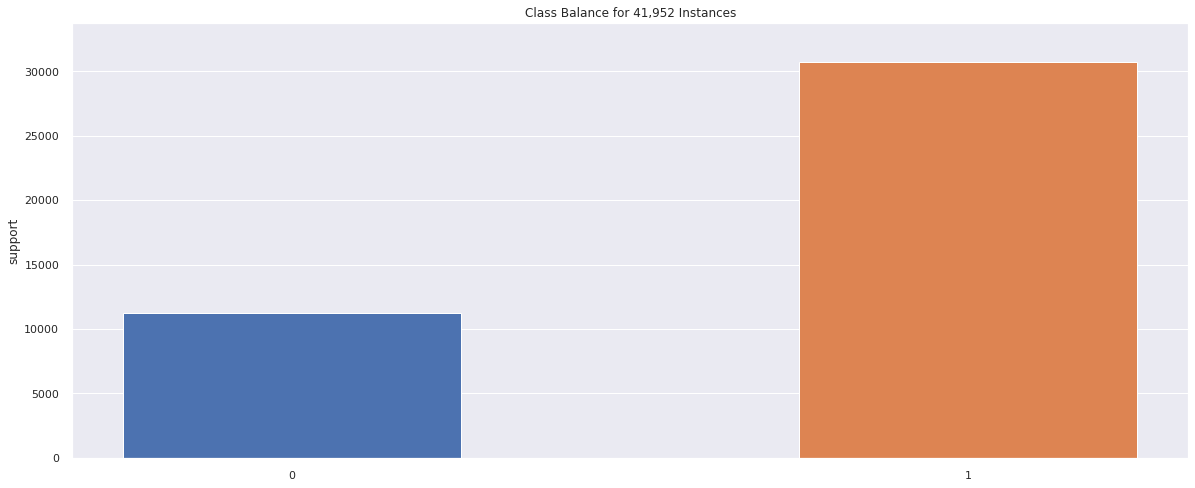

Undersampling data to match min class: 0 of size: 11265


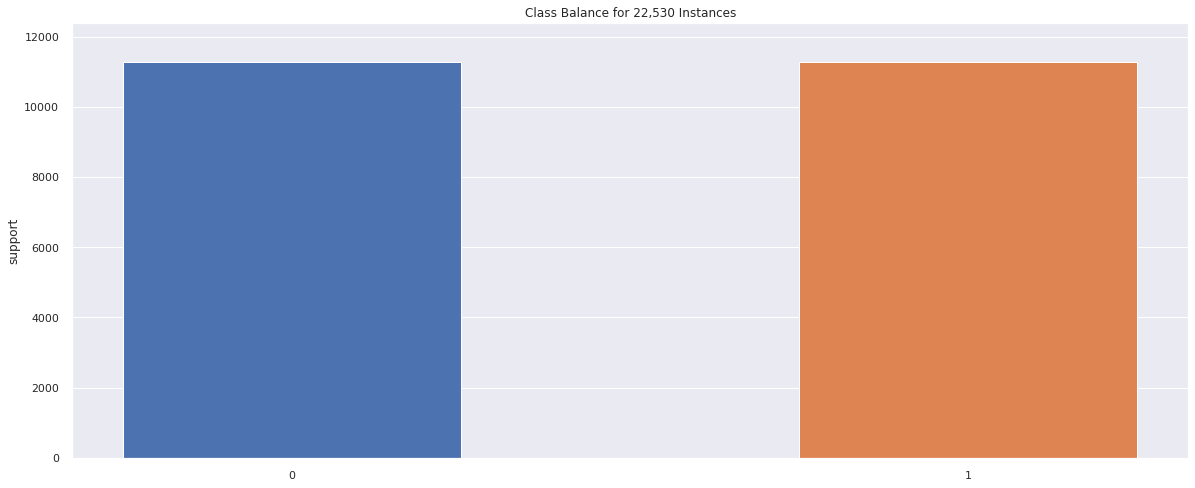

In [19]:
dataCoreLemmaPruneBal2 = mvutils.classBalanceUndersample(dataCoreLemmaPrune, 'overall_posneg')

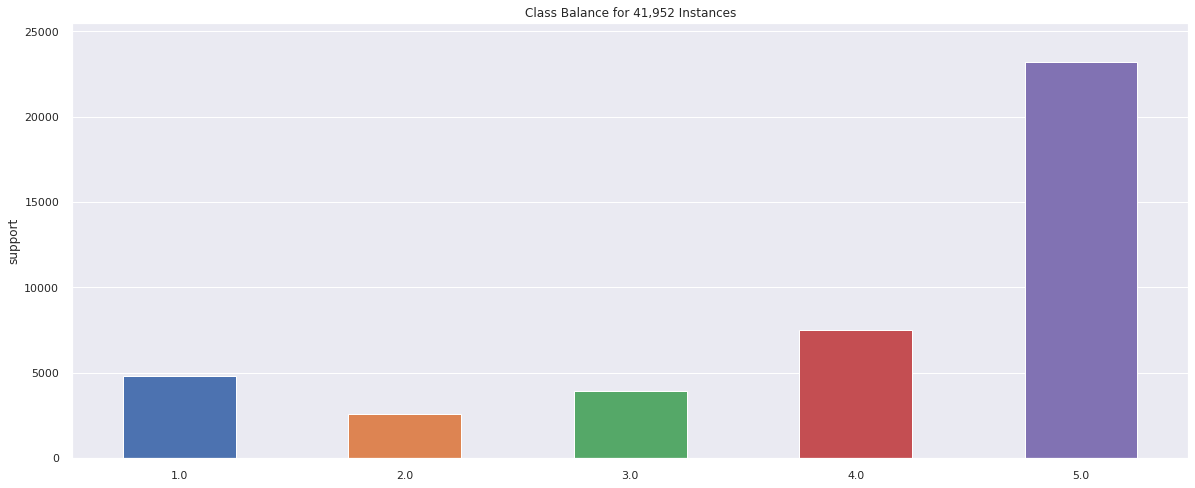

Undersampling data to match min class: 2.0 of size: 2555


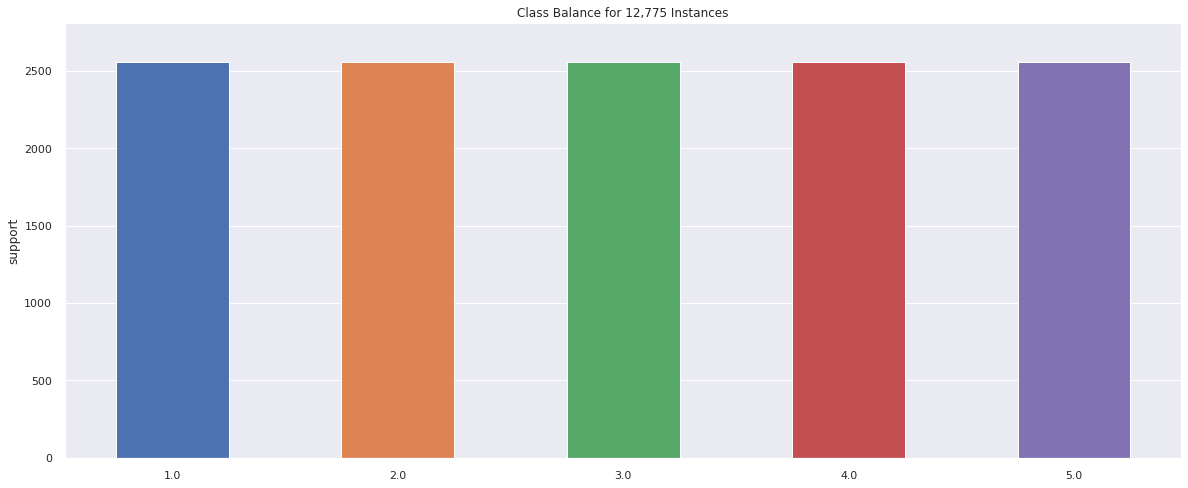

In [20]:
dataCoreLemmaPruneBal5 = mvutils.classBalanceUndersample(dataCoreLemmaPrune, 'overall')

**Reporting [Lemma.Core.Flair.5 Star]**

              precision    recall  f1-score   support

         1.0       0.33      0.85      0.48      2939
         2.0       0.16      0.01      0.02      2939
         3.0       0.00      0.00      0.00      2939
         4.0       0.23      0.03      0.05      2939
         5.0       0.39      0.88      0.54      2939

    accuracy                           0.35     14695
   macro avg       0.22      0.35      0.22     14695
weighted avg       0.22      0.35      0.22     14695



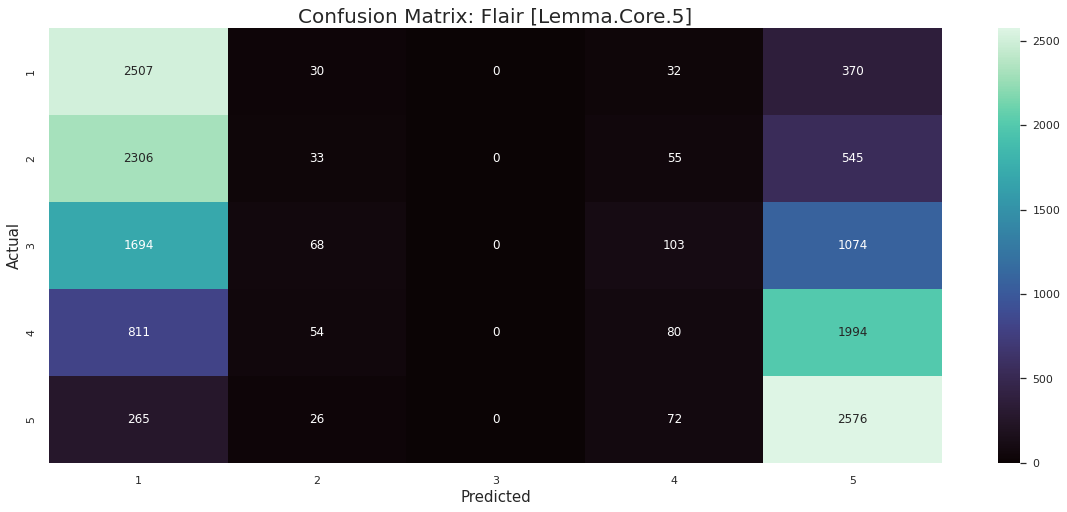

In [21]:
cwutils.showTestReport(df=dataCoreLemmaBal5,
               colNameActual='overall',
               colNamePredict='reviewText_lemma_flairSent_norm',
               axisLabels=axis_labels5,
               chartTitle='Flair [Lemma.Core.5]')

**Reporting [Lemma.Core.Flair.Pos/Neg]**

              precision    recall  f1-score   support

           0       0.84      0.75      0.80     13410
           1       0.78      0.86      0.82     13410

    accuracy                           0.81     26820
   macro avg       0.81      0.81      0.81     26820
weighted avg       0.81      0.81      0.81     26820



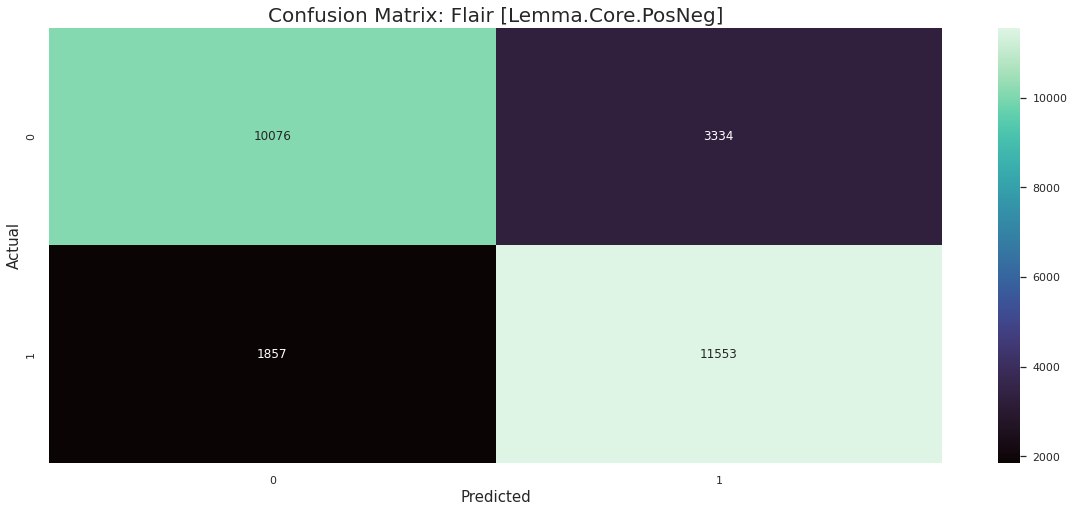

In [22]:
cwutils.showTestReport(df=dataCoreLemmaBal2,
               colNameActual='overall_posneg',
               colNamePredict='reviewText_lemma_flairSent_posneg',
               axisLabels=axis_labels2,
               chartTitle='Flair [Lemma.Core.PosNeg]')

**Reporting [Lemma.Core.spaCyTextBlob.5 Star]**

              precision    recall  f1-score   support

         1.0       0.63      0.06      0.12      2939
         2.0       0.33      0.09      0.15      2939
         3.0       0.22      0.53      0.31      2939
         4.0       0.28      0.43      0.34      2939
         5.0       0.51      0.35      0.41      2939

    accuracy                           0.29     14695
   macro avg       0.39      0.29      0.27     14695
weighted avg       0.39      0.29      0.27     14695



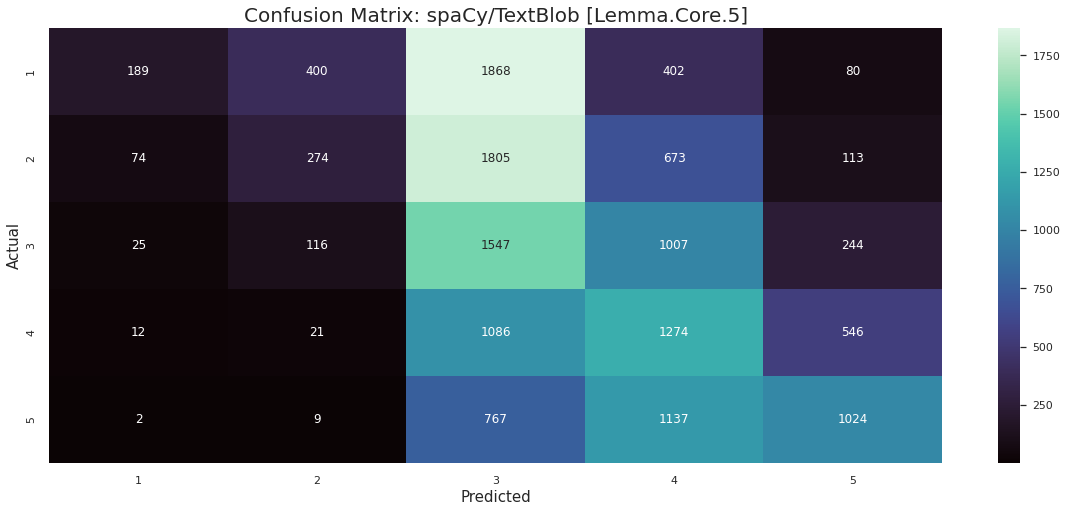

In [23]:
cwutils.showTestReport(df=dataCoreLemmaBal5,
               colNameActual='overall',
               colNamePredict='reviewText_lemma_tb_pol_norm',
               axisLabels=axis_labels5,
               chartTitle='spaCy/TextBlob [Lemma.Core.5]')

**Reporting [Lemma.Core.SpacyTextBlob.Pos/Neg]**

              precision    recall  f1-score   support

           0       0.73      0.44      0.55     13410
           1       0.60      0.83      0.70     13410

    accuracy                           0.64     26820
   macro avg       0.66      0.64      0.62     26820
weighted avg       0.66      0.64      0.62     26820



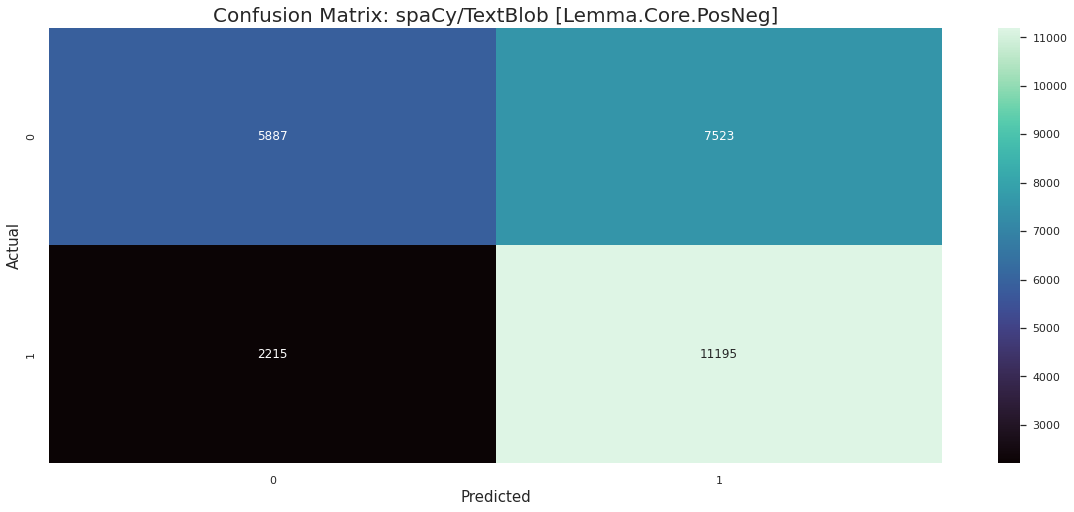

In [24]:
cwutils.showTestReport(df=dataCoreLemmaBal2,
               colNameActual='overall_posneg',
               colNamePredict='reviewText_lemma_tb_pol_posneg',
               axisLabels=axis_labels2,
               chartTitle='spaCy/TextBlob [Lemma.Core.PosNeg]')

# BERT - [Lemma.Core]

In [52]:
import importlib
importlib.reload(cwutils)


<module 'cw_df_metric_utils' from '/home/magni/ML_Root/project_root/utility_files/cw_df_metric_utils.py'>

(14695, 768)

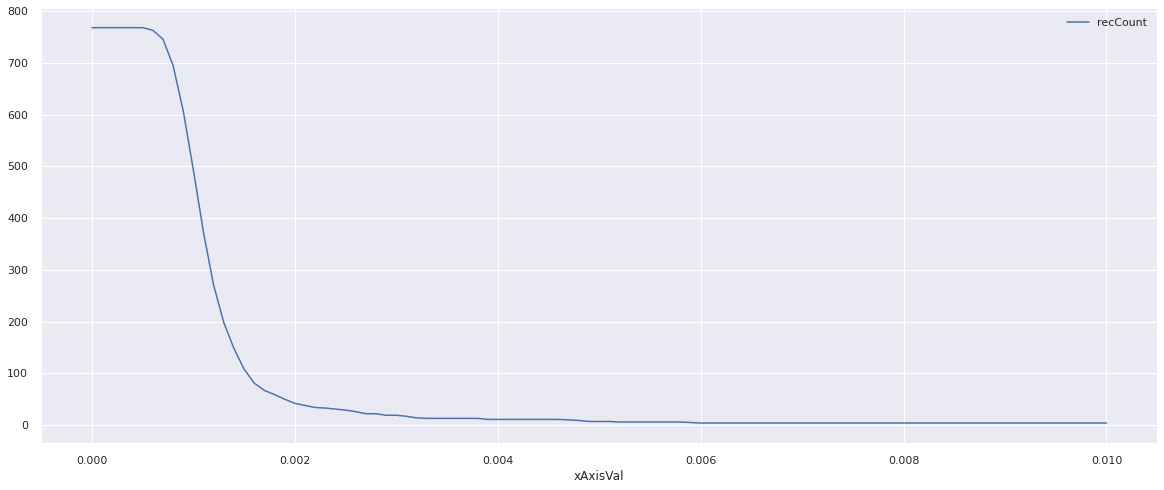

In [53]:
classifier = XGBClassifier(eval_metric='mlogloss')

modelBertCoreLemma5, dfmodelBertCoreLemma5 = cwutils.createBertModel(df=dataCoreLemmaBal5,
                bertColumn='reviewText_lemma_bert',
                uniqueColumn='uuid',
                targetColumn='overall',
                classifier=classifier
                )



              precision    recall  f1-score   support

         1.0       0.51      0.55      0.53       578
         2.0       0.39      0.38      0.38       592
         3.0       0.36      0.33      0.34       601
         4.0       0.36      0.38      0.37       576
         5.0       0.55      0.54      0.55       592

    accuracy                           0.43      2939
   macro avg       0.43      0.44      0.43      2939
weighted avg       0.43      0.43      0.43      2939



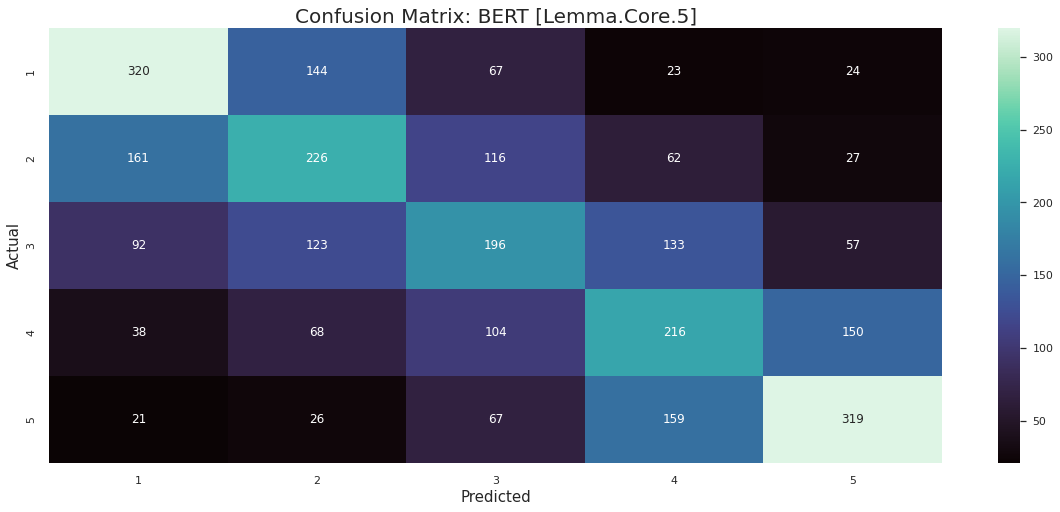

In [54]:
cwutils.showTestReport(df=dfmodelBertCoreLemma5,
               colNameActual='y_test',
               colNamePredict='y_pred',
               axisLabels=axis_labels5,
               chartTitle='BERT [Lemma.Core.5]')

In [28]:
import importlib
importlib.reload(cwutils)


<module 'cw_df_metric_utils' from '/home/magni/ML_Root/project_root/utility_files/cw_df_metric_utils.py'>

'featureFilter length > 0'

(14695, 42)

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         1.0       0.50      0.57      0.53       578
         2.0       0.36      0.37      0.37       592
         3.0       0.32      0.25      0.28       601
         4.0       0.36      0.39      0.37       576
         5.0       0.57      0.57      0.57       592

    accuracy                           0.43      2939
   macro avg       0.42      0.43      0.43      2939
weighted avg       0.42      0.43      0.42      2939



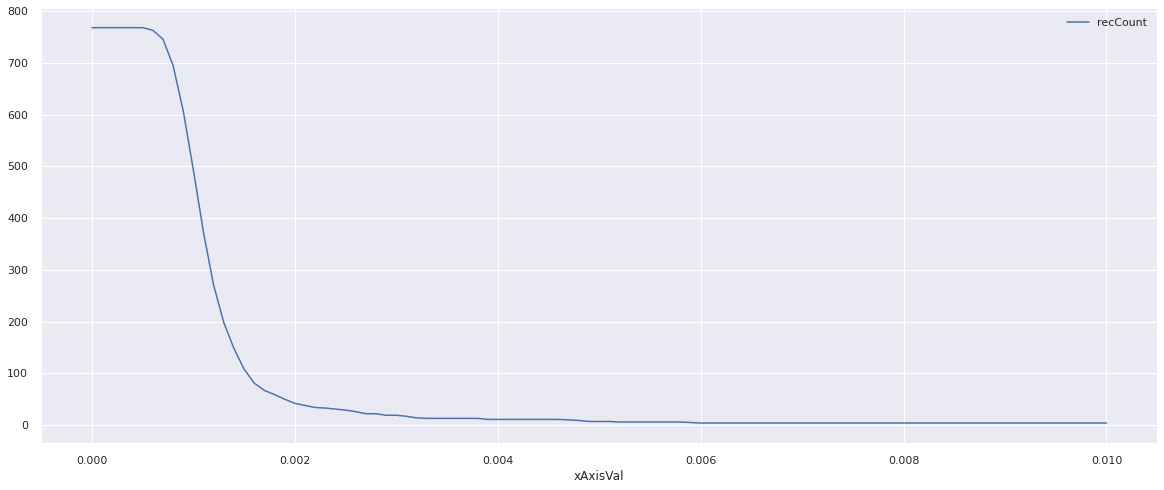

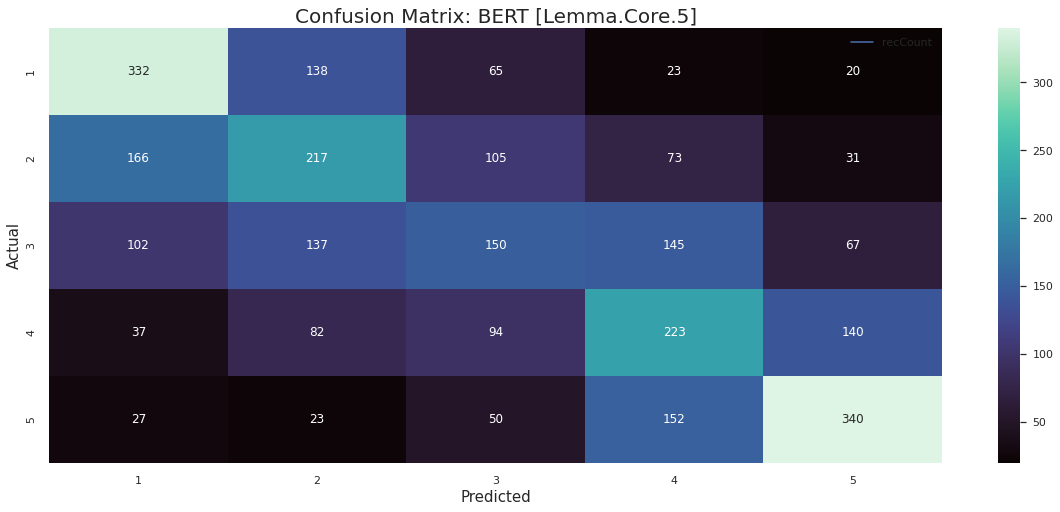

In [56]:
tDf = cwutils.plotModelFeatureImportance(modelBertCoreLemma5, returnAbove=0.0020)

modelTest, dfTestModel= cwutils.createBertModel(df=dataCoreLemmaBal5,
                bertColumn='reviewText_lemma_bert',
                uniqueColumn='uuid',
                targetColumn='overall',
                classifier=classifier,
                featureFilter=tDf['feature'].tolist()                                                     
                )

cwutils.showTestReport(df=dfTestModel,
               colNameActual='y_test',
               colNamePredict='y_pred',
               axisLabels=axis_labels5,
               chartTitle='BERT [Lemma.Core.5]')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


dfBert = cwutils.getBertEncodeFrame(df=dataCoreLemmaBal5,
                                    bertColumn='reviewText_lemma_bert',
                                    uniqueColumn='uuid',
                                    otherColumns=['overall']
                                    )

#Get list of all columns
features = list(dfBert.columns)

#Remove unique and target colums
features.remove('uuid')
features.remove('overall')
features_all = features.copy()
features_small = features.copy()

#Get list of "low value" features, the "filter"
featureFilter = tDf['feature'].tolist()

#Remove high first so list shortens from tail
featureFilter.sort(reverse=True)
#Remove features identified previously
#So we only have the good ones left
for x in featureFilter:
    del features_small[x]

print (len(features_all))
print (len(features_small))
print (len(featureFilter))

#train_sizes = [0.1, 0.2, 0.5, 1.0]
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
 target = 'overall'

#train_sizes, train_scores, validation_scores = learning_curve(
#    estimator = RandomForestClassifier(),
#    X = dfBert[features],
#    y = dfBert[target],
#    train_sizes = train_sizes, 
#    cv = 5,
#    scoring = 'f1_weighted'
#)

In [ ]:

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

#xgb_model = xgboost.XGBClassifier(num_class=7,
#                                  learning_rate=0.1,
#                                  num_iterations=1000,
#                                  max_depth=10,
#                                  feature_fraction=0.7, 
#                                  scale_pos_weight=1.5,
#                                  boosting='gbdt',
#                                  metric='multiclass',
#                                  eval_metric='mlogloss'
                                
estimator = XGBClassifier(eval_metric='mlogloss')
plot_learning_curve(
    #estimator, title, dfBert[features_small], dfBert[target], axes=axes[:, 0], ylim=(0.0, 1.01), cv=cv, n_jobs=16, train_sizes=train_sizes
    estimator, title, dfBert[features_small], dfBert[target], axes=axes[:, 0], ylim=(0.0, 1.01), cv=cv, n_jobs=16
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:

#estimator = XGBClassifier()
#estimator = SVC(gamma=0.001)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    #estimator, title, dfBert[features_small], dfBert[target], axes=axes[:, 1], ylim=(0.0, 1.01), cv=cv, n_jobs=16, train_sizes=train_sizes
    estimator, title, dfBert[features_small], dfBert[target], axes=axes[:, 1], ylim=(0.0, 1.01), cv=cv, n_jobs=16, train_sizes=train_sizes
)

plt.show()


In [44]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=[0.1, 0.2, 0.5, 1.0],
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        verbose=4
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:32] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................., score=(train=0.982, test=0.284) total time= 6.7min


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/magni/python_env/ML1010_env2/lib64/python3

[11:49:57] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................., score=(train=0.945, test=0.437) total time=16.5min
[12:06:31] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ......................., score=(train=nan, test=nan) total time=   0.0s
[12:06:31] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:32] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................., score=(train=0.982, test=0.295) total time= 6.8min


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:57] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................., score=(train=0.946, test=0.427) total time=16.5min
[12:06:31] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting", "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................., score=(train=0.982, test=0.286) total time= 6.8min


**Reporting [Lemma.Prune.Flair.5 Star]**

              precision    recall  f1-score   support

         1.0       0.31      0.88      0.46      2555
         2.0       0.14      0.01      0.02      2555
         3.0       0.00      0.00      0.00      2555
         4.0       0.31      0.02      0.04      2555
         5.0       0.41      0.83      0.55      2555

    accuracy                           0.35     12775
   macro avg       0.23      0.35      0.21     12775
weighted avg       0.23      0.35      0.21     12775



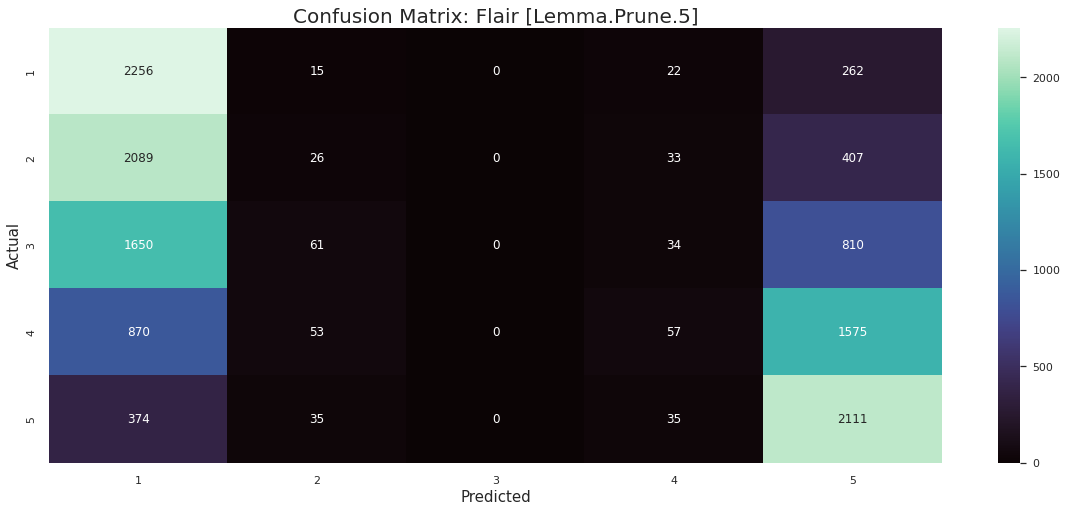

In [ ]:
cwutils.showTestReport(df=dataCoreLemmaPruneBal5,
               colNameActual='overall',
               colNamePredict='reviewText_lemma_flairSent_norm',
               axisLabels=axis_labels5,
               chartTitle='Flair [Lemma.Prune.5]')

**Reporting [Lemma.Prune.Flair.Pos/Neg]**

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     11265
           1       0.80      0.79      0.79     11265

    accuracy                           0.80     22530
   macro avg       0.80      0.80      0.80     22530
weighted avg       0.80      0.80      0.80     22530



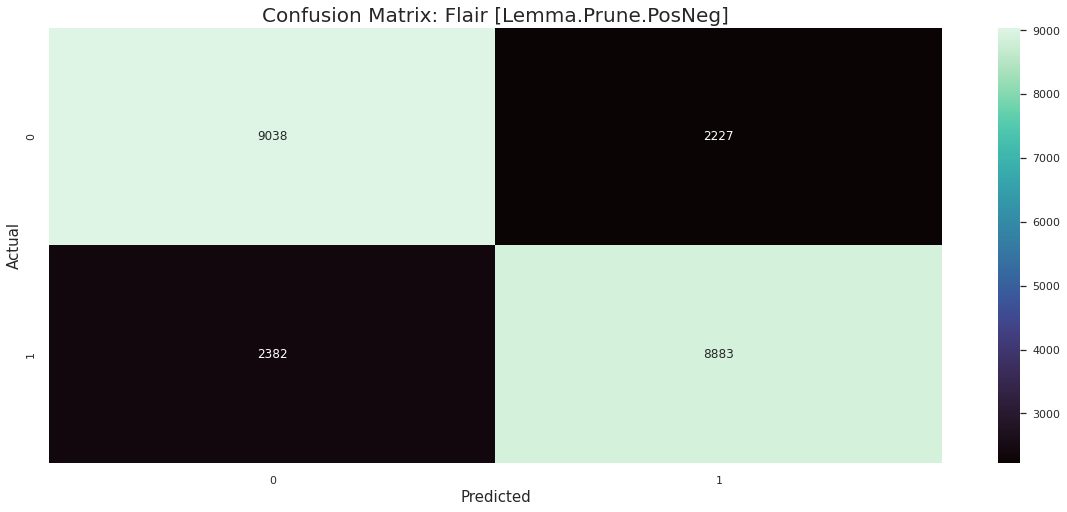

In [ ]:
cwutils.showTestReport(df=dataCoreLemmaPruneBal2,
               colNameActual='overall_posneg',
               colNamePredict='reviewText_lemma_flairSent_posneg',
               axisLabels=axis_labels2,
               chartTitle='Flair [Lemma.Prune.PosNeg]')

**Reporting [Lemma.Prune.spaCyTextBlob.5 Star]**

              precision    recall  f1-score   support

         1.0       0.57      0.04      0.08      2555
         2.0       0.31      0.09      0.14      2555
         3.0       0.23      0.54      0.32      2555
         4.0       0.28      0.50      0.36      2555
         5.0       0.52      0.22      0.31      2555

    accuracy                           0.28     12775
   macro avg       0.38      0.28      0.24     12775
weighted avg       0.38      0.28      0.24     12775



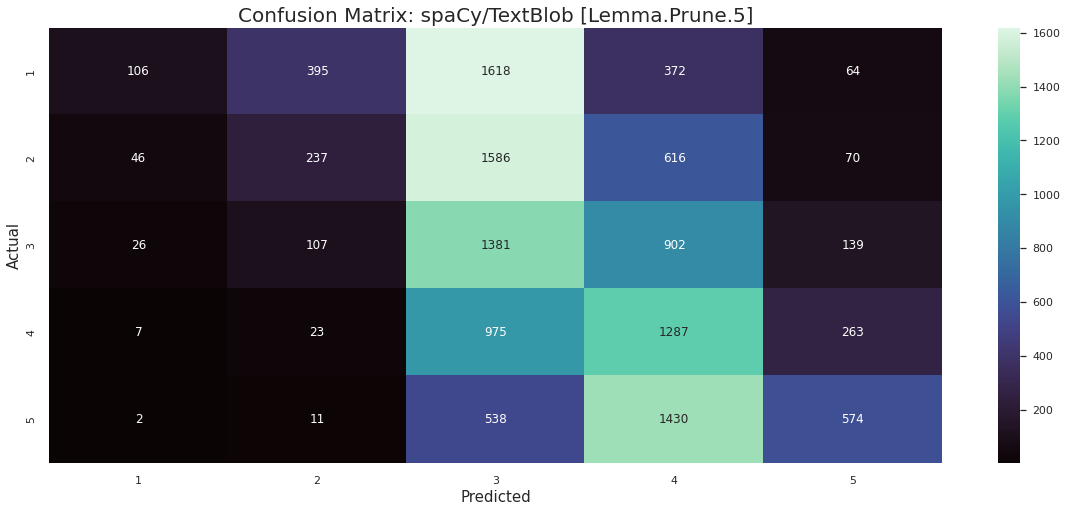

In [ ]:
cwutils.showTestReport(df=dataCoreLemmaPruneBal5,
               colNameActual='overall',
               colNamePredict='reviewText_lemma_tb_pol_norm',
               axisLabels=axis_labels5,
               chartTitle='spaCy/TextBlob [Lemma.Prune.5]')

**Reporting [Lemma.Prune.SpacyTextBlob.Pos/Neg]**

              precision    recall  f1-score   support

           0       0.85      0.40      0.54     11265
           1       0.61      0.93      0.74     11265

    accuracy                           0.66     22530
   macro avg       0.73      0.66      0.64     22530
weighted avg       0.73      0.66      0.64     22530



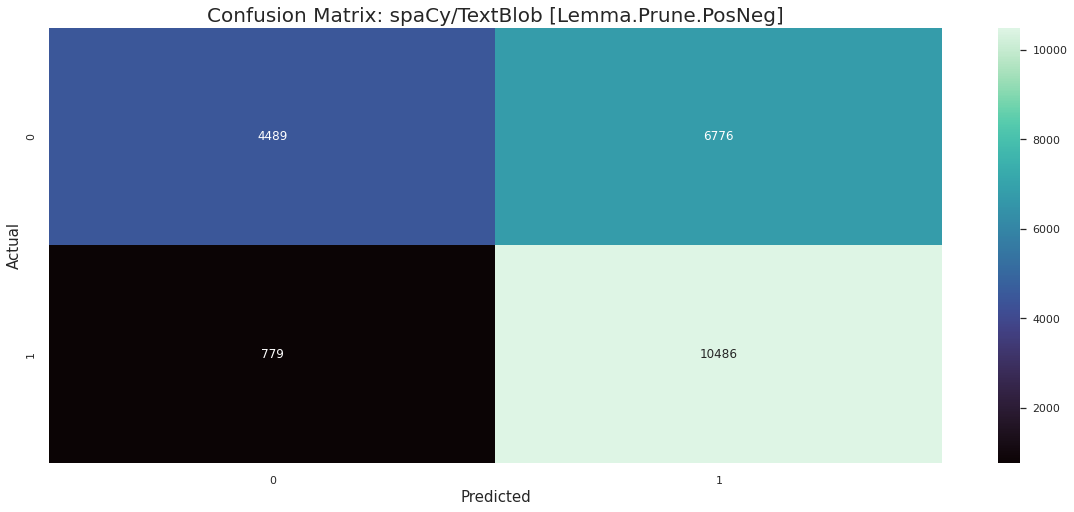

In [ ]:
cwutils.showTestReport(df=dataCoreLemmaPruneBal2,
               colNameActual='overall_posneg',
               colNamePredict='reviewText_lemma_tb_pol_posneg',
               axisLabels=axis_labels2,
               chartTitle='spaCy/TextBlob [Lemma.Prune.PosNeg]')

BERT - [Lemma.Prune.5]

              precision    recall  f1-score   support

         1.0       0.46      0.62      0.53       824
         2.0       0.34      0.28      0.30       869
         3.0       0.33      0.21      0.26       854
         4.0       0.36      0.40      0.38       809
         5.0       0.55      0.61      0.58       860

    accuracy                           0.42      4216
   macro avg       0.41      0.42      0.41      4216
weighted avg       0.41      0.42      0.41      4216



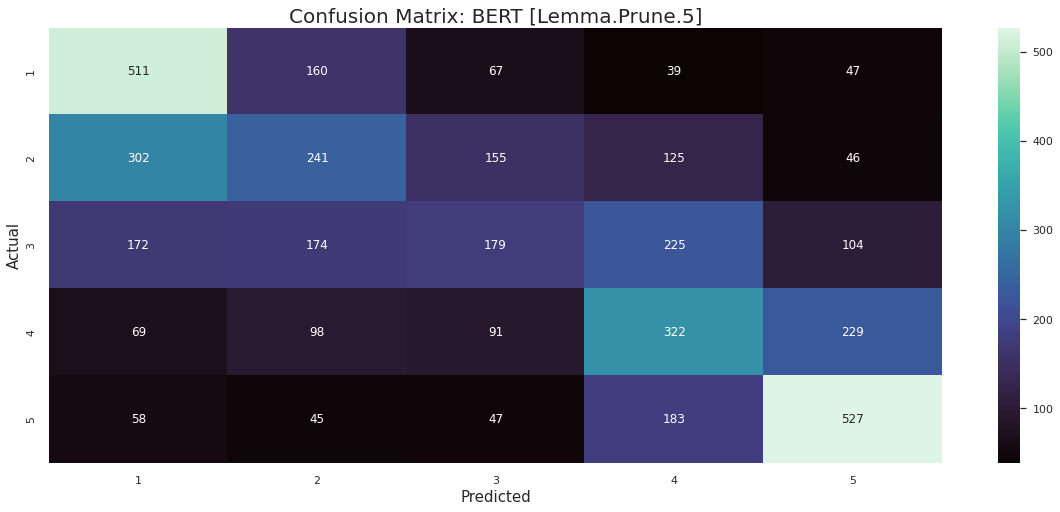

In [ ]:
modelBertPruneLemma5, dfmodelBertPruneLemma5 = cwutils.createBertModel(df=dataCoreLemmaPruneBal5,
                bertColumn='reviewText_lemma_bert',
                uniqueColumn='uuid',
                targetColumn='overall'
                )

cwutils.showTestReport(df=dfmodelBertPruneLemma5,
               colNameActual='y_test',
               colNamePredict='y_pred',
               axisLabels=axis_labels5,
               chartTitle='BERT [Lemma.Prune.5]')

BERT - [Lemma.Prune.posneg]

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3653
           1       0.81      0.80      0.80      3782

    accuracy                           0.80      7435
   macro avg       0.80      0.80      0.80      7435
weighted avg       0.80      0.80      0.80      7435



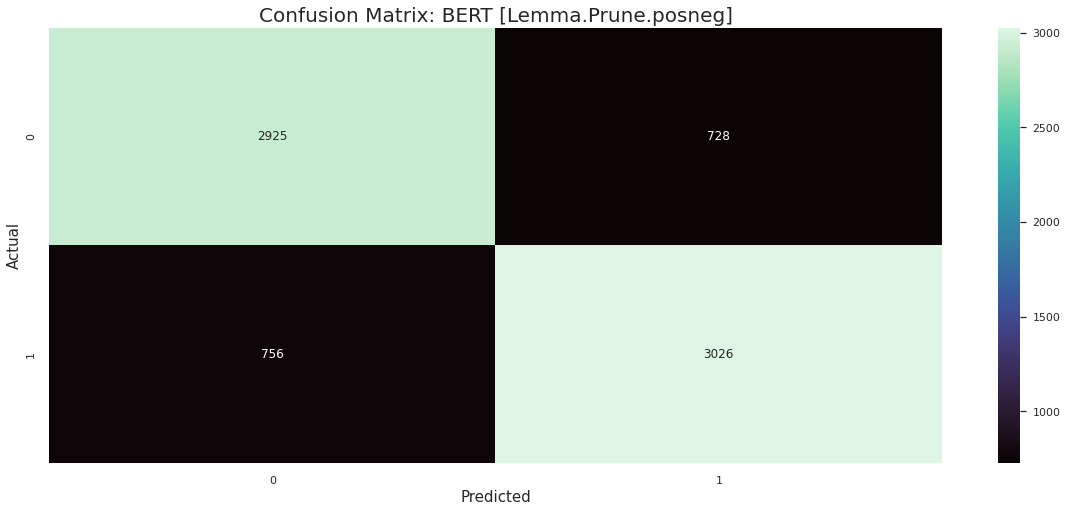

In [ ]:
modelBertPruneLemma2, dfmodelBertPruneLemma2 = cwutils.createBertModel(df=dataCoreLemmaPruneBal2,
                bertColumn='reviewText_lemma_bert',
                uniqueColumn='uuid',
                targetColumn='overall_posneg'
                )

cwutils.showTestReport(df=dfmodelBertPruneLemma2,
               colNameActual='y_test',
               colNamePredict='y_pred',
               axisLabels=axis_labels2,
               chartTitle='BERT [Lemma.Prune.posneg]')

In [ ]:
tDfBert = data_bal.copy()

In [ ]:
tDfBert.info()

In [ ]:
dfBert = cwutils.getBertEncodeFrame(df=tDfBert,
                            bertColumn='reviewText_adjectives_bert',
                            uniqueColumn='uuid',
                            otherColumns=['overall']
                            )

In [ ]:
#Get X Value from dataframe
dfX = dfBert.copy()
dfX.drop(['uuid', 'overall'], axis=1, inplace=True)

X = dfX.to_numpy()
Y = np.array(dfBert['overall'])

#X = dataset[:,0:8]
#Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
modelBert5 = XGBClassifier()
modelBert5.fit(X_train, y_train)
# make predictions for test data
y_pred = modelBert5.predict(X_test)
#predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
results = metrics.classification_report(y_test, 
                                        y_pred,
                                        zero_division=0)
print(results)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cwutils.plotConfusionMatrix(cm, axis_labels5, 'BERT (adjectives) 5')

In [ ]:
tDfBert = data_bal_posneg.copy()

In [ ]:
tDfBert.info()

In [ ]:
dfBert = cwutils.getBertEncodeFrame(df=tDfBert,
                            bertColumn='reviewText_adjectives_bert',
                            uniqueColumn='uuid',
                            otherColumns=['overall_posneg']
                            )

In [ ]:
#Get X Value from dataframe
dfX = dfBert.copy()
dfX.drop(['uuid', 'overall_posneg'], axis=1, inplace=True)

X = dfX.to_numpy()
Y = np.array(dfBert['overall_posneg'])

#X = dataset[:,0:8]
#Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
modelBert5 = XGBClassifier()
modelBert5.fit(X_train, y_train)
# make predictions for test data
y_pred = modelBert5.predict(X_test)
#predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
results = metrics.classification_report(y_test, 
                                        y_pred,
                                        zero_division=0)
print(results)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cwutils.plotConfusionMatrix(cm, axis_labels2, 'BERT (adjectives) (positive-negative')

In [ ]:
tDfBert = data_bal.copy()

In [ ]:
tDfBert.info()

In [ ]:
dfBert = cwutils.getBertEncodeFrame(df=tDfBert,
                            bertColumn='reviewText_verbs_bert',
                            uniqueColumn='uuid',
                            otherColumns=['overall']
                            )

In [ ]:
#Get X Value from dataframe
dfX = dfBert.copy()
dfX.drop(['uuid', 'overall'], axis=1, inplace=True)

X = dfX.to_numpy()
Y = np.array(dfBert['overall'])

#X = dataset[:,0:8]
#Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
modelBert5 = XGBClassifier()
modelBert5.fit(X_train, y_train)
# make predictions for test data
y_pred = modelBert5.predict(X_test)
#predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
results = metrics.classification_report(y_test, 
                                        y_pred,
                                        zero_division=0)
print(results)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cwutils.plotConfusionMatrix(cm, axis_labels5, 'BERT (verbs) 5')

In [ ]:
tDfBert = data_bal_posneg.copy()

In [ ]:
tDfBert.info()

In [ ]:
dfBert = cwutils.getBertEncodeFrame(df=tDfBert,
                            bertColumn='reviewText_verbs_bert',
                            uniqueColumn='uuid',
                            otherColumns=['overall_posneg']
                            )

In [ ]:
#Get X Value from dataframe
dfX = dfBert.copy()
dfX.drop(['uuid', 'overall_posneg'], axis=1, inplace=True)

X = dfX.to_numpy()
Y = np.array(dfBert['overall_posneg'])

#X = dataset[:,0:8]
#Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
modelBert5 = XGBClassifier()
modelBert5.fit(X_train, y_train)
# make predictions for test data
y_pred = modelBert5.predict(X_test)
#predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
results = metrics.classification_report(y_test, 
                                        y_pred,
                                        zero_division=0)
print(results)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cwutils.plotConfusionMatrix(cm, axis_labels2, 'BERT (verbs) (positive-negative')